In [344]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

Creating classification data (2 Classes)

In [345]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [346]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.652375,2.214841,0.111038,1.250532,0.690056,1
1,2.147986,1.404602,-3.262227,1.041044,-1.088884,0
2,0.013979,1.826671,1.811580,-0.647950,1.096452,1
3,1.639782,3.235650,0.149747,2.980417,2.915824,1
4,-0.441141,1.703855,2.357735,-0.462708,0.821542,1


In [347]:
df.shape

(100, 6)

In [348]:
df['target'].unique()

array([1, 0])

In [349]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [350]:
# function for feature/column sampling

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [351]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [352]:
# sample_rows(df, 0.2)
# sample_features(df, 0.8)
# combined_sampling(df, 0.5, 0.8)

Row Sampling

In [353]:
df1 = sample_rows(df, 0.2)
print(df1.shape)

df2 = sample_rows(df, 0.2)
print(df2.shape)

df3 = sample_rows(df, 0.2)
print(df3.shape)

(20, 6)
(20, 6)
(20, 6)


Column Sampling

In [354]:
# df1 = sample_features(df, 0.8)
# df2 = sample_features(df, 0.8)
# df3 = sample_features(df, 0.8)

# print(df1.shape)
# print(df2.shape)
# print(df3.shape)

Combined Sampling

In [355]:
df1 = combined_sampling(df, 0.5, 0.5)
df2 = combined_sampling(df, 0.5, 0.5)
df3 = combined_sampling(df, 0.5, 0.5)

print(df1.shape)
print(df2.shape)
print(df3.shape)

(50, 3)
(50, 3)
(50, 3)


/tmp/ipython-input-350-1119984455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipython-input-350-1119984455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipython-input-350-1119984455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [356]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [333]:
print(df1.iloc[:, -1].shape)
print(df1.iloc[:, 0:5].shape)

(20,)
(20, 5)


In [334]:
clf1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:5], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:5], df3.iloc[:, -1])

DecisionTreeClassifier()

In [335]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[2] <= -0.199\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.625, 0.5, '  False')]

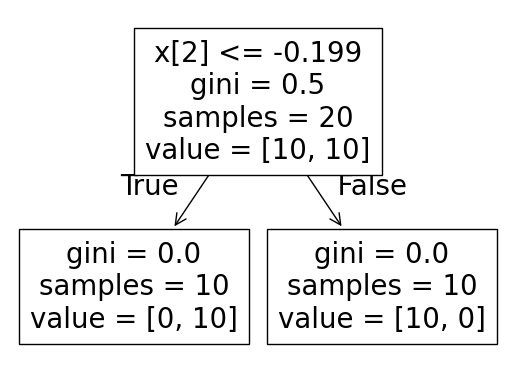

In [336]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[2] <= -0.48\ngini = 0.42\nsamples = 20\nvalue = [6, 14]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.625, 0.5, '  False')]

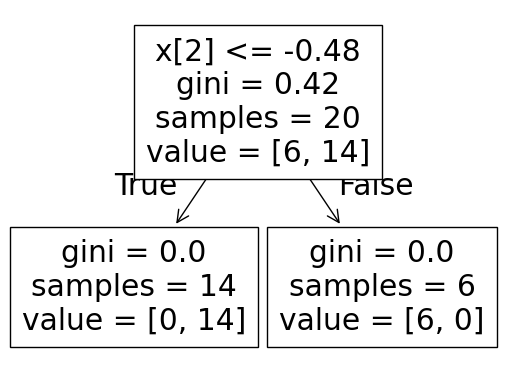

In [337]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[0] <= 0.196\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.625, 0.5, '  False')]

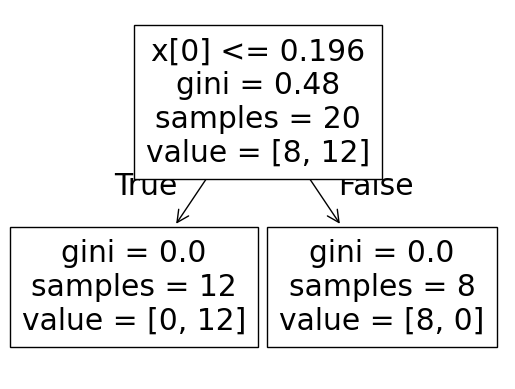

In [338]:
plot_tree(clf3)

Prediction on Query point {Xq}

In [339]:
clf1.predict(np.array([0.55,	-1.87, -1.80, -1.55, -0.03]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [340]:
clf2.predict(np.array([0.55,	-1.87, -1.80, -1.55, -0.03]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [341]:
clf3.predict(np.array([0.55,	-1.87, -1.80, -1.55, -0.03]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])